In [1]:
import numpy as np
import cv2
import os
import keras
from keras.layers import Input
from model import VGG16
import matplotlib.pyplot as plt

def padding(x):
    h,w,c = x.shape
    size = max(h,w)
    paddingh = (size-h)//2
    paddingw = (size-w)//2
    temp_x = np.zeros((size,size,c))
    temp_x[paddingh:h+paddingh,paddingw:w+paddingw,:] = x
    return temp_x

def load_image(path):
    x = cv2.imread(path)
    sh = x.shape
    x = np.array(x, dtype=np.float32)
    x = x[..., ::-1]
    # Zero-center by mean pixel
    x[..., 0] -= 103.939
    x[..., 1] -= 116.779
    x[..., 2] -= 123.68
    x = padding(x)
    x = cv2.resize(x, target_size, interpolation=cv2.INTER_LINEAR)
    x = np.expand_dims(x,0)
    return x,sh

def cut(pridict,shape):
    h,w,c = shape
    size = max(h, w)
    pridict = cv2.resize(pridict, (size,size))
    paddingh = (size - h) // 2
    paddingw = (size - w) // 2
    return pridict[paddingh:h + paddingh, paddingw:w + paddingw]

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def getres(pridict,shape):
    pridict = sigmoid(pridict)*255
    pridict = np.array(pridict, dtype=np.uint8)
    pridict = np.squeeze(pridict)
    pridict = cut(pridict, shape)
    return pridict

def laplace_edge(x):
    laplace = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    edge = cv2.filter2D(x/255.,-1,laplace)
    edge = np.maximum(np.tanh(edge),0)
    edge = edge * 255
    edge = np.array(edge, dtype=np.uint8)
    return edge

Using TensorFlow backend.
C:\Users\Mayuri Gupta\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Mayuri Gupta\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Mayuri Gupta\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Mayuri Gupta\anaconda3\lib\site-packages\tensorflo

In [18]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

#model_name = 'model/PFA_00050.h5'
model_name = 'model/PFA_00050.h5'
target_size = (256,256)

dropout = False
with_CPFE = True
with_CA = True
with_SA = True

if target_size[0 ] % 32 != 0 or target_size[1] % 32 != 0:
    raise ValueError('Image height and wight must be a multiple of 32')

model_input = Input(shape=(target_size[0],target_size[1],3))
model = VGG16(model_input,dropout=dropout, with_CPFE=with_CPFE, with_CA=with_CA, with_SA=with_SA)
model.load_weights(model_name,by_name=True)

for layer in model.layers:
    layer.trainable = False

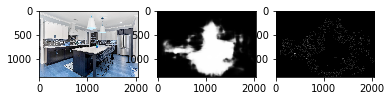

In [5]:
image_path = 'image/Kitchen.jpg'
img, shape = load_image(image_path)
img = np.array(img, dtype=np.float32)
sa = model.predict(img)
sa = getres(sa, shape)
plt.title('saliency')
plt.subplot(131)
plt.imshow(cv2.imread(image_path))
plt.subplot(132)
plt.imshow(sa,cmap='gray')
plt.subplot(133)
edge = laplace_edge(sa)
plt.imshow(edge,cmap='gray')
plt.show()

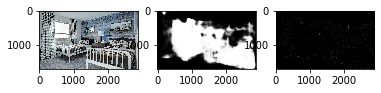

True

In [33]:
from PIL import Image
import urllib.request
URL = 'Test Set 1/Original Images/img_test_14.jpg'
#with urllib.request.urlopen(URL) as url:
#    with open('temp.jpg', 'wb') as f:
#       f.write(url.read())

#img = Image.open('temp.jpg')
#img, shape = load_image('temp.jpg')
img, shape = load_image(URL)
img = np.array(img, dtype=np.float32)
sa = model.predict(img)
#print(sa)
sa = getres(sa, shape)
plt.title('saliency')
plt.subplot(131)
plt.imshow(cv2.imread(URL))
plt.subplot(132)
plt.imshow(sa,cmap='gray')
#print(sa)
plt.subplot(133)
edge = laplace_edge(sa)
plt.imshow(edge,cmap='gray')
plt.show()

#saving an image
filename='Test Set 1/Salient Images 3/img_test_14.jpg'
cv2.imwrite(filename,sa)

0


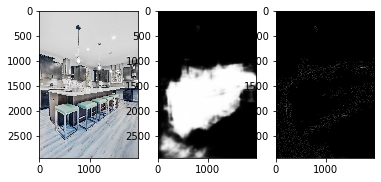

1


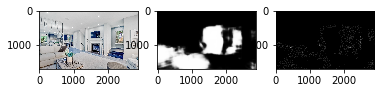

2


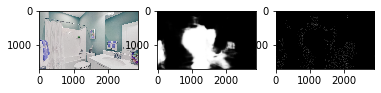

3


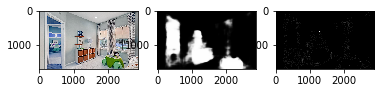

4


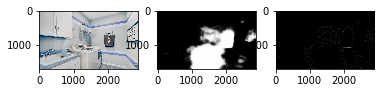

5


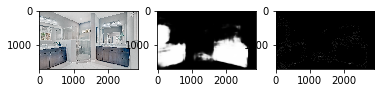

6


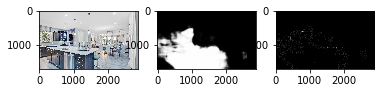

7


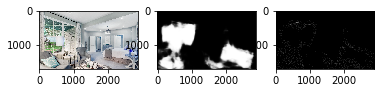

8


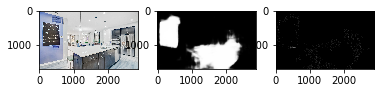

9


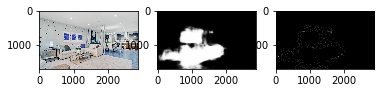

10


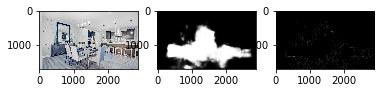

11


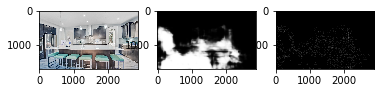

12


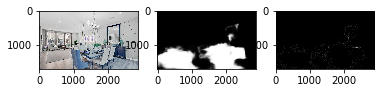

13


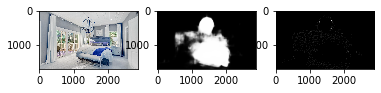

14


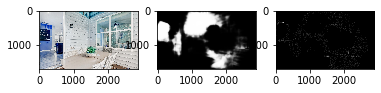

15


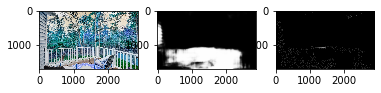

16


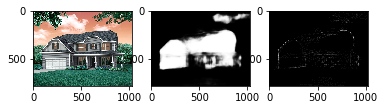

17


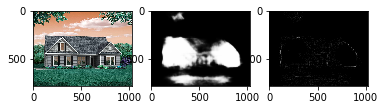

18


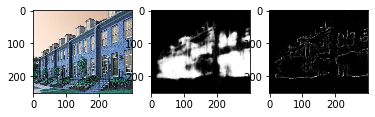

19


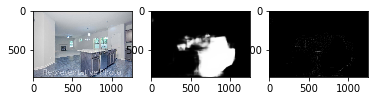

20


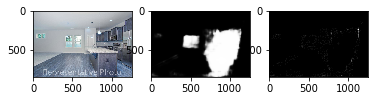

21


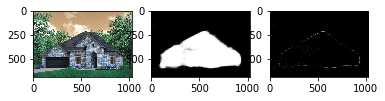

22


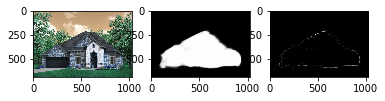

23


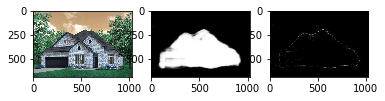

24


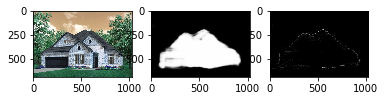

25


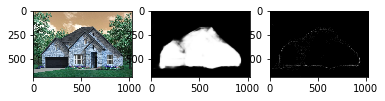

26


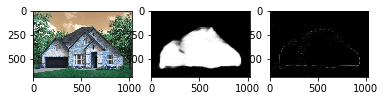

27


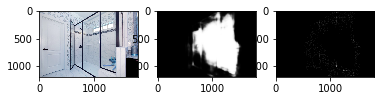

28


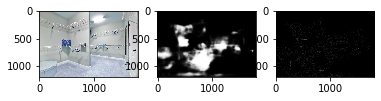

29


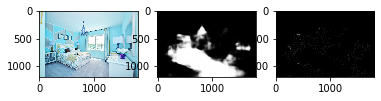

30


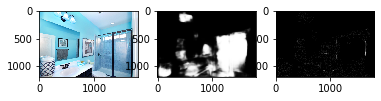

31


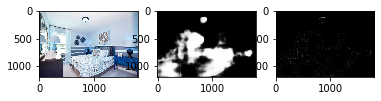

32


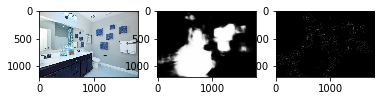

33


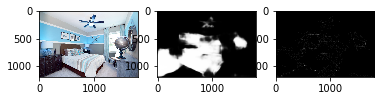

34


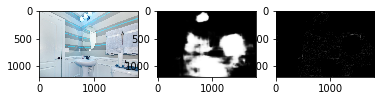

35


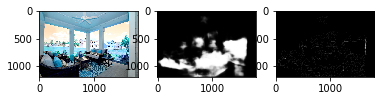

36


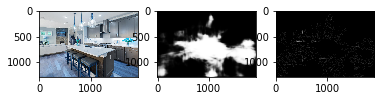

37


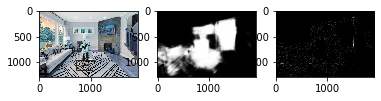

38


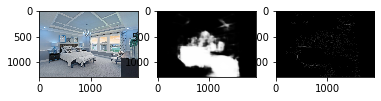

39


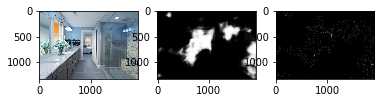

40


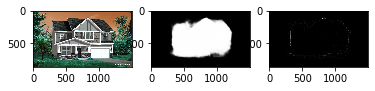

41


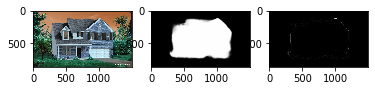

42


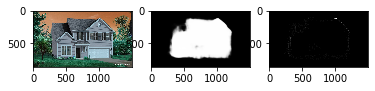

43


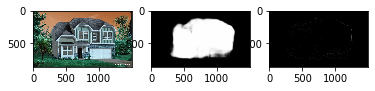

44


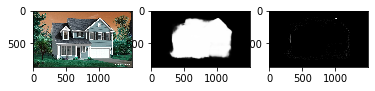

45


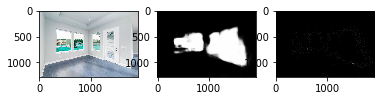

46


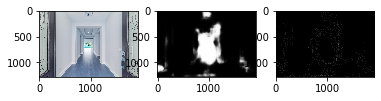

47


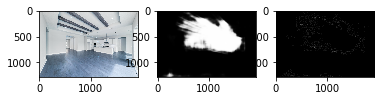

48


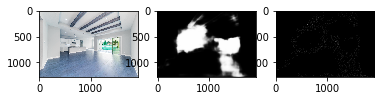

49


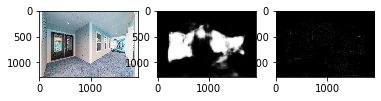

50


KeyError: 50

In [28]:
import pandas as pd
df=pd.read_csv('TestSetImages2.csv',usecols=['Url'])
#df.iloc[27]
df['Url'] = df['Url'].astype(str)
df2=pd.read_csv('TestSetImages2.csv',usecols=['id'])
#df.iloc[27]
df2['id'] = df2['id'].astype(str)
#df['Url'][27]
from PIL import Image
import urllib.request
#URL = 'https://nhs-dynamic.secure.footprint.net//Images/Homes/DreesHom/16731607-200630.jpg'
#URL=df['Url'][27]
for i in range(0,400):
    print(i)
    URL=df['Url'][i]
    with urllib.request.urlopen(URL) as url:
        with open('temp.jpg', 'wb') as f:
            f.write(url.read())
    #img = Image.open('temp.jpg')
    img, shape = load_image('temp.jpg')
    img = np.array(img, dtype=np.float32)
    sa = model.predict(img)
    sa = getres(sa, shape)
    plt.title('saliency')
    plt.subplot(131)
    plt.imshow(cv2.imread('temp.jpg'))
    plt.subplot(132)
    plt.imshow(sa,cmap='gray')
    plt.subplot(133)
    edge = laplace_edge(sa)
    plt.imshow(edge,cmap='gray')
    plt.show()
    #saving an image
    j=df2['id'][i]
    filename='Test Set 2/salient images/img'+j+'.jpg'
    cv2.imwrite(filename,sa)

In [28]:
df2=pd.read_csv('Mayuri_Elevation.csv',usecols=['id'])
#df.iloc[27]
df2['id'] = df2['id'].astype(str)
df2['id'][267]

'3081'